In [2]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

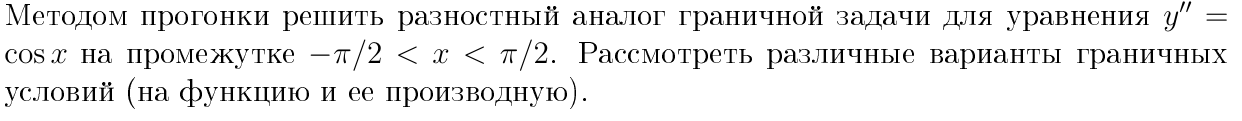

In [3]:
Image('task 9.png')